# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [135]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [136]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chui
Processing Record 2 of Set 1 | waitangi
Processing Record 3 of Set 1 | bilibino
Processing Record 4 of Set 1 | georgetown
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | santiago de cao
Processing Record 7 of Set 1 | margaret river
Processing Record 8 of Set 1 | kyzylorda
Processing Record 9 of Set 1 | ilulissat
Processing Record 10 of Set 1 | espargos
City not found. Skipping...
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | kingston
Processing Record 13 of Set 1 | olonkinbyen
Processing Record 14 of Set 1 | bairnsdale
Processing Record 15 of Set 1 | port pirie
Processing Record 16 of Set 1 | knyaze-volkonskoye
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | flying fish cove
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | warrnambool
Processing Record 21 of Set 1 | filey
Processing Re

In [137]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [138]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,chui,-33.6971,-53.4616,22.40,54,5,4.34,UY,1705923054
1,waitangi,-43.9535,-176.5597,17.68,96,100,6.26,NZ,1705923054
2,bilibino,68.0546,166.4372,-20.53,69,100,5.68,RU,1705923054
3,georgetown,5.4112,100.3354,27.96,77,20,4.12,MY,1705923055
4,avarua,-21.2078,-159.7750,25.03,83,75,2.57,CK,1705923055


In [139]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [140]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,22.40,54,5,4.34,UY,1705923054
1,waitangi,-43.9535,-176.5597,17.68,96,100,6.26,NZ,1705923054
2,bilibino,68.0546,166.4372,-20.53,69,100,5.68,RU,1705923054
3,georgetown,5.4112,100.3354,27.96,77,20,4.12,MY,1705923055
4,avarua,-21.2078,-159.7750,25.03,83,75,2.57,CK,1705923055


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

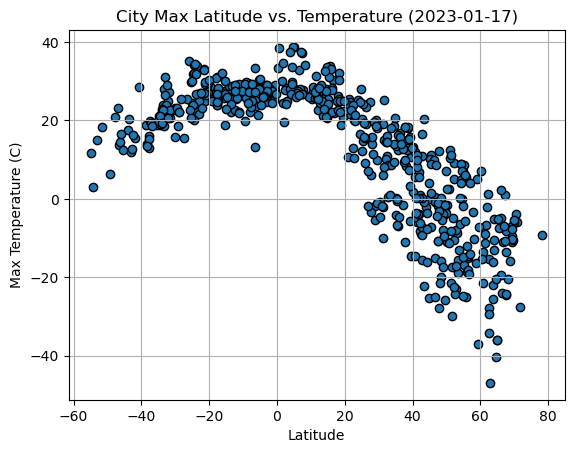

In [142]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)
plt.title("City Max Latitude vs. Temperature (2023-01-17)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

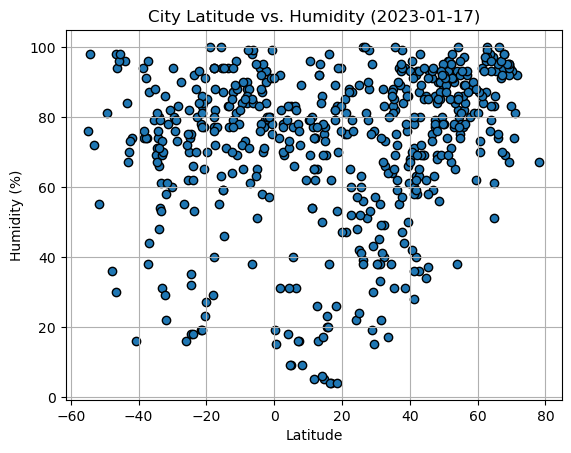

In [143]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.title("City Latitude vs. Humidity (2023-01-17)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

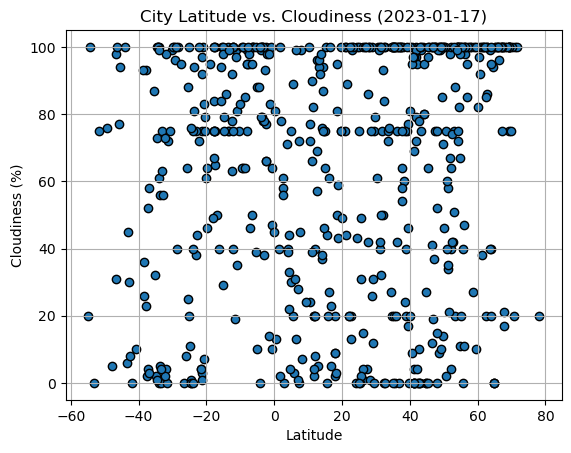

In [144]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2023-01-17)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

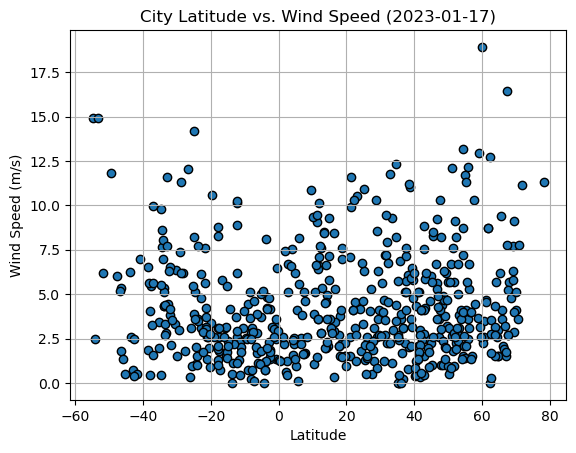

In [145]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2023-01-17)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [158]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,ylabel,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [159]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bilibino,68.0546,166.4372,-20.53,69,100,5.68,RU,1705923054
3,georgetown,5.4112,100.3354,27.96,77,20,4.12,MY,1705923055
7,kyzylorda,44.8528,65.5092,0.01,34,0,6.00,KZ,1705923056
8,ilulissat,69.2167,-51.1000,-10.99,67,75,7.72,GL,1705923056
10,kingston,17.9970,-76.7936,26.23,79,20,1.54,JM,1705923058


In [160]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,chui,-33.6971,-53.4616,22.40,54,5,4.34,UY,1705923054
1,waitangi,-43.9535,-176.5597,17.68,96,100,6.26,NZ,1705923054
4,avarua,-21.2078,-159.7750,25.03,83,75,2.57,CK,1705923055
5,santiago de cao,-7.9589,-79.2392,22.07,88,75,3.09,PE,1705923056
6,margaret river,-33.9500,115.0667,19.52,66,0,5.36,AU,1705922871


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8408015660334069


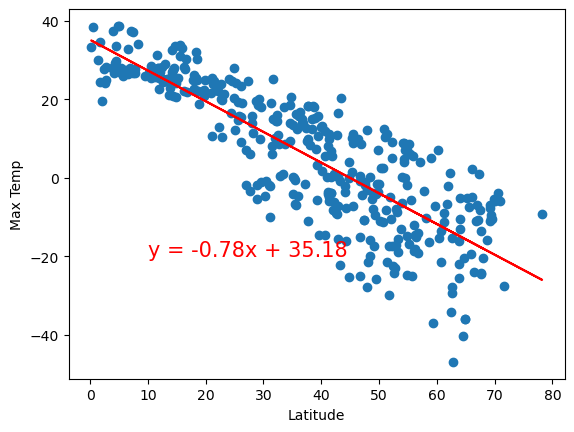

In [161]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values, "Max Temp",(10, -20))

The r-value is: 0.6103549997163086


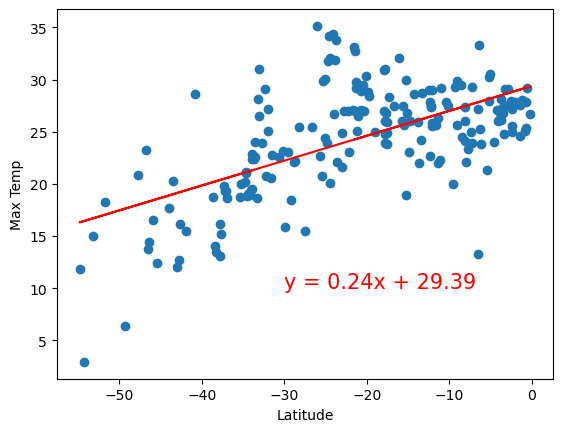

In [162]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values,y_values,"Max Temp", (-30,10))

**Discussion about the linear relationship:** 
For the nothern hemisphere, there is a negative, strong, linear relationship between latitude and maximum temperature. Meaning the higher the latitude (the further away the city is from the equator heading towards north), the lower the max temperature becomes.
For the southern hemisphere, there is a positive, medium-strong, linear relationship between latitude and maximum temperature. Meaning the closer the city is to the equator coming from the south, the higher the max temperature becomes. This shows the cities located closer to the equator are much hotter than the cities far away from the equator in both the northern and southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4428673517129663


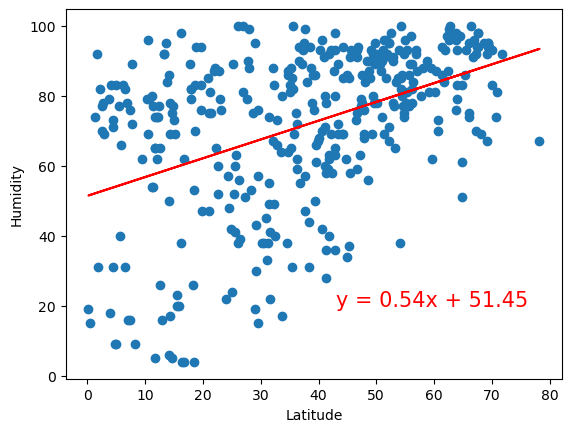

In [163]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity", (43,20))

The r-value is: 0.20078518665529657


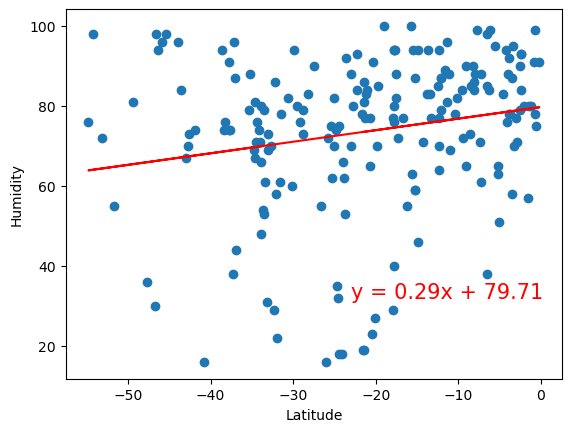

In [165]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plot_linear_regression(x_values,y_values,"Humidity", (-23,32))

**Discussion about the linear relationship:** For the northern hemisphere, there is a medium-strong, positive, linear relationship between latitude and humidity. Meaning the higher the latitude (further away north from equator the city is), the more humid the city is.
For the southern hemisphere, there is a medium-weak, positive, linear relationship between latitude and humidity. Meaning the higher the latitude (the closer to the equator the city is from south), the humidity levels will slightly increase. The relationship between position of city and humidity is stronger for cities located in the northern hemisphere than the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25146745256382114


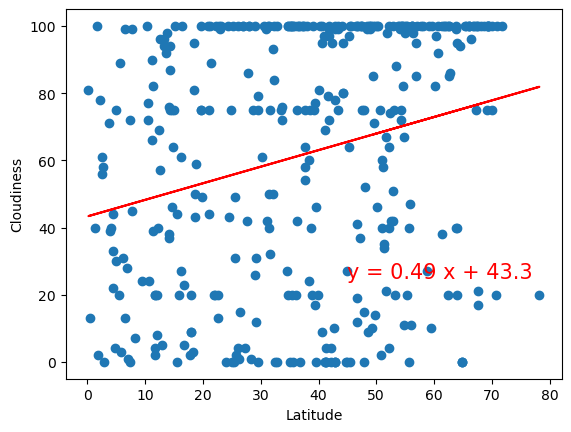

In [154]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness", (45,25))

The r-value is: 0.3130951530436345


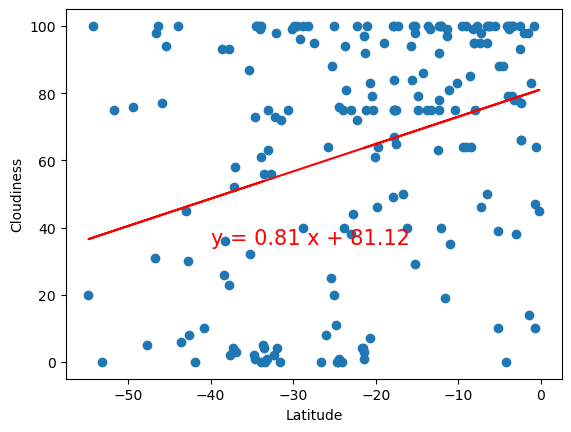

In [155]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values,y_values,"Cloudiness", (-40,35))

**Discussion about the linear relationship:** For the northern hemisphere, there is a medium-strong, positive, linear relationship between latitude and cloudiness. Meaning the further away the city is from the equator (heading north), the more cloudy the city is. For the southern hemisphere, there is a strong, positive, linear relationship between latitude and cloudiness. Meaning the closer to the equator the city is (heading from south), the more cloudy the city is. The relationship between position of city against cloudiness is stronger in the southern hemisphere than the northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.08333786279204387


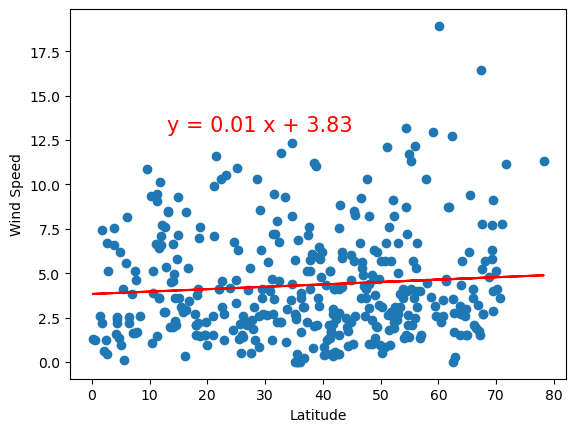

In [156]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed", (13,13))

The r-value is: -0.32222865726800926


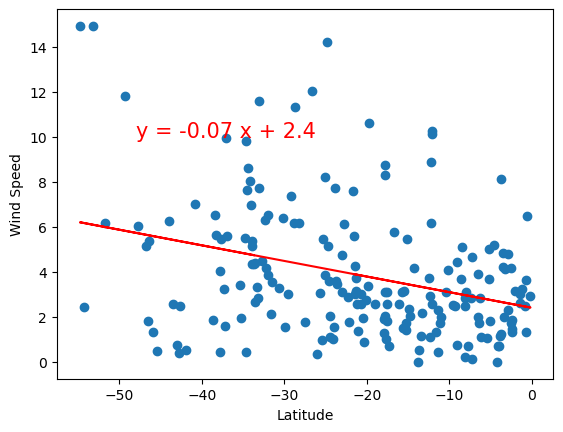

In [157]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values,y_values,"Wind Speed", (-48,10))

**Discussion about the linear relationship:** For the northern hemisphere, there is almost no relationship between latitude (location of city) and wind speed. On the other hand for the southern hemisphere, there is a medium-weak, negative relationship between latitude and wind speed. Meaning the closer the city is located to the equator (coming from the south), the less windy it slightly becomes.